# Feature Selection/Extraction and Outlier Detection

In [31]:
#!pip install umap-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2,SelectFromModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris,load_diabetes
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
import umap

In [9]:
#VarianceThreshold removes all zero-variance features, i.e. features that have the same value in all samples.
X = [[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1]] #in this exemple it keeps just feature2
t=0.8*(1-0.8)
sel=VarianceThreshold(threshold=t)
X_new=sel.fit_transform(X)
X_new

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1]])

# Feature Selection using SelectKBest, ExtraTreeClassifier and LinearSVC modelling, 

[5.1 3.5 1.4 0.2] [1.4 0.2]


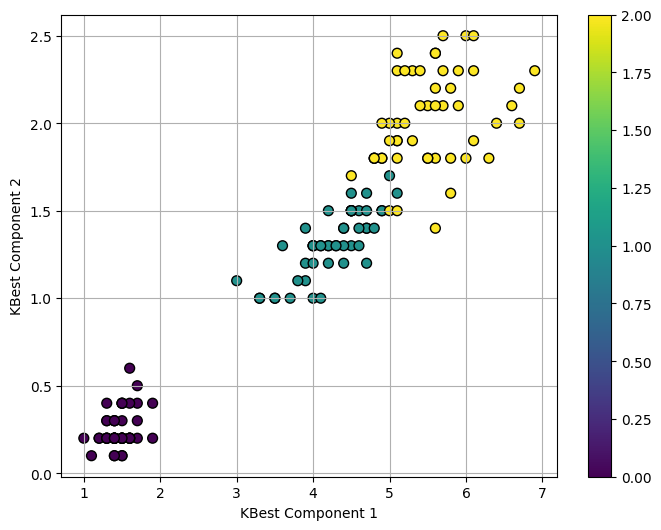

In [23]:
#Select K Best for iris dataset 
X=load_iris().data
Y=load_iris().target

sel=SelectKBest(chi2, k=2)
X_new=sel.fit_transform(X,Y)
print(X[0],X_new[0])
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_new[:, 0], X_new[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('KBest Component 1')
plt.ylabel('KBest Component 2')
plt.colorbar(scatter)
plt.grid()
plt.show()

In [21]:
model=ExtraTreeClassifier(max_depth=3, criterion='gini',random_state=1)
model.fit(X,Y)
print(model.feature_importances_)
sel=SelectFromModel(model,prefit=True)
X_new=sel.transform(X)
print(X[0],X_new[0])

[0.05651    0.         0.62760699 0.315883  ]
[5.1 3.5 1.4 0.2] [1.4 0.2]


In [27]:
model=LinearSVC(C=0.01,penalty='l2')
model.fit(X,Y)
sel=SelectFromModel(model)
X_new=sel.transform(X)
print(X[0],X_new[0])

[5.1 3.5 1.4 0.2] [3.5 1.4]


/usr/local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# Feature extraction and visualization using PCA, t- SNE and Umap methods

In [26]:
X=load_iris().data
Y=load_iris().target
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

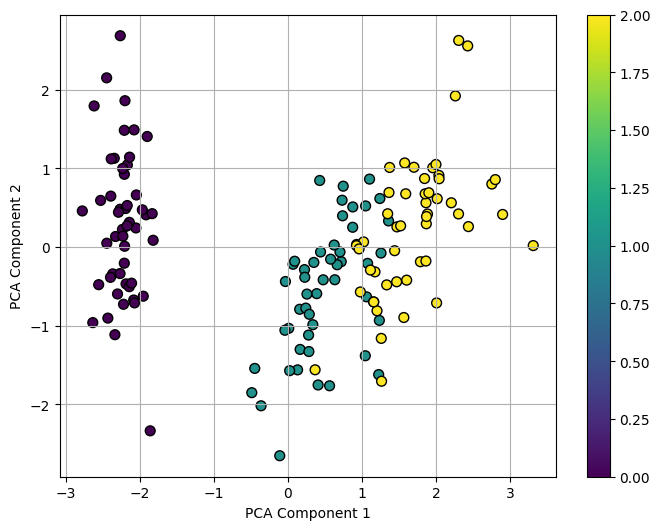

In [27]:
# Apply PCA
pca = PCA(n_components=2)  # Set the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)
# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.grid()
plt.show()


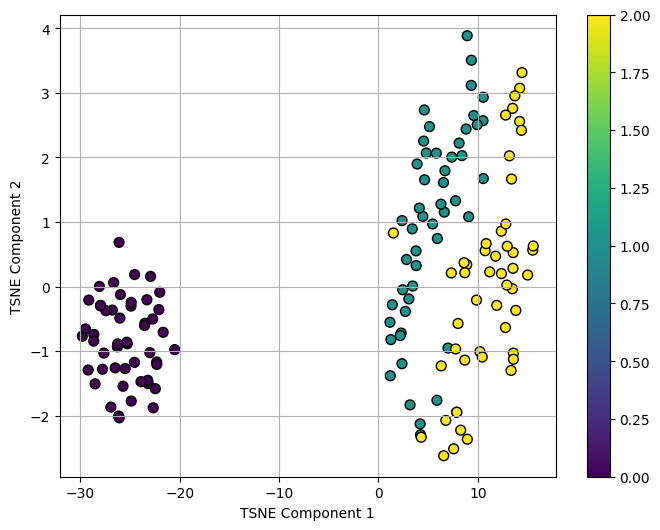

In [29]:
# Apply t-distributed Stochastic Neighbor Embedding (t-SNE) to visualize high-dimensional data in a lower-dimensional space.
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(scatter)
plt.grid()
plt.show()


/usr/local/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


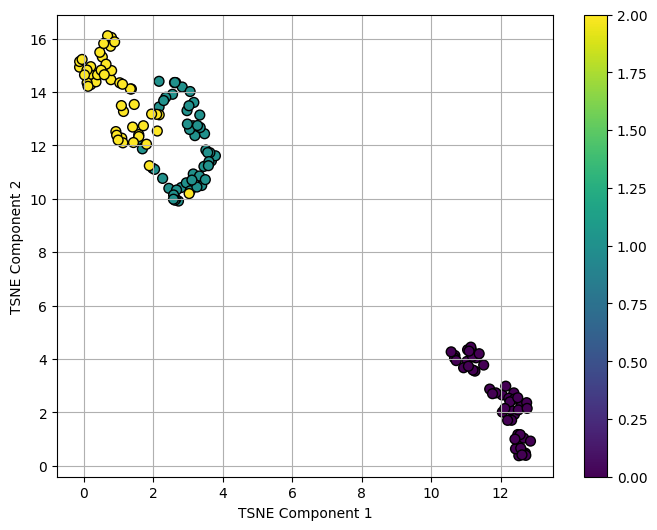

In [33]:
# Apply Uniform Manifold Approximation and Projection (UMAP)
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(scatter)
plt.grid()
plt.show()

# Identify outliers using quantile method

<Axes: >

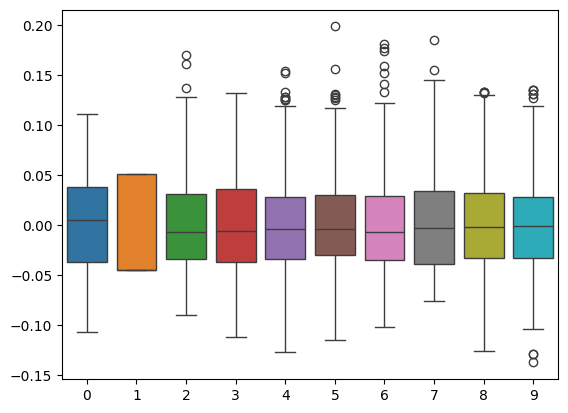

In [2]:
diabetes=load_diabetes()
X=diabetes.data
sns.boxplot(data=X)

In [64]:
def identify_outliers(data, whisker_factor=1.5):
  q1 = np.quantile(data, 0.25)
  q3 = np.quantile(data, 0.75)   
  iqr = q3 - q1
  lower_bound = q1 - whisker_factor * iqr
  upper_bound = q3 + whisker_factor * iqr
  return data[(data < lower_bound) | (data > upper_bound)]

In [70]:
for col in range (0,10):
  outlier_indices = identify_outliers(X[:,col], whisker_factor=1.5)
  print(col,outlier_indices)

0 []
1 []
2 [0.16085492 0.13714305 0.17055523]
3 []
4 [0.15253776 0.13327442 0.12639466 0.15391371 0.12777061 0.1250187
 0.1250187  0.12777061]
5 [0.19878799 0.13146107 0.15588665 0.12801644 0.1251981  0.12739014
 0.13020848]
6 [0.13331777 0.18117906 0.15172596 0.17749742 0.15908923 0.14068104
 0.17381578]
7 [0.18523444 0.15534454]
8 [0.13359728 0.13359728 0.13339674 0.13237579]
9 [ 0.13561183 -0.12948301  0.13561183  0.13146972  0.12732762 -0.12948301
  0.13561183 -0.13776723  0.13146972]


In [80]:
mask=X> 0.18 
X[mask.any(axis=1)]

array([[ 0.04170844, -0.04464164, -0.06440781,  0.03564379,  0.01219057,
        -0.05799375,  0.18117906, -0.0763945 , -0.00061174, -0.05078298],
       [ 0.00538306,  0.05068012,  0.0347509 , -0.00109143,  0.15253776,
         0.19878799, -0.06180903,  0.18523444,  0.01556846,  0.07348023]])

# IsolationForest to detect anomalies or outliers 

In [8]:
X=load_iris().data
Y=load_iris().target
df=pd.DataFrame(X, columns=["Sepal_length","Sepal_width", "Petal_length","Petal_width"])
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed
iso_forest.fit(df)

# Predict anomalies (-1 for anomaly, 1 for normal)
predictions = iso_forest.predict(X)
df['anomaly']=predictions

/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [12]:
# Count normal vs. anomalous samples
print(df['anomaly'].value_counts())

# Display anomalies
anomalies = df[df['anomaly'] == -1]
print("Detected anomalies:", anomalies)


anomaly
 1    135
-1     15
Name: count, dtype: int64
Detected anomalies:      Sepal_length  Sepal_width  Petal_length  Petal_width  anomaly
13            4.3          3.0           1.1          0.1       -1
14            5.8          4.0           1.2          0.2       -1
15            5.7          4.4           1.5          0.4       -1
22            4.6          3.6           1.0          0.2       -1
32            5.2          4.1           1.5          0.1       -1
33            5.5          4.2           1.4          0.2       -1
41            4.5          2.3           1.3          0.3       -1
60            5.0          2.0           3.5          1.0       -1
62            6.0          2.2           4.0          1.0       -1
98            5.1          2.5           3.0          1.1       -1
109           7.2          3.6           6.1          2.5       -1
117           7.7          3.8           6.7          2.2       -1
118           7.7          2.6           6.9          2

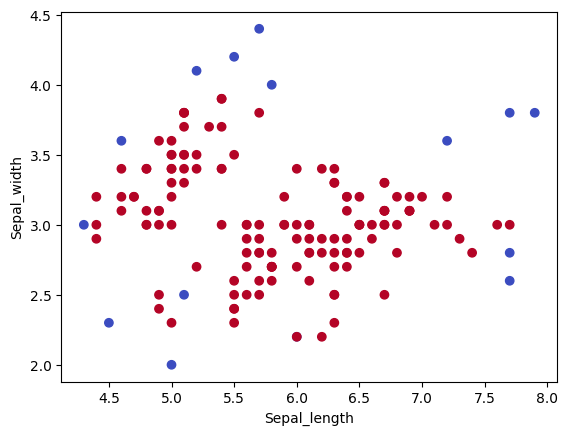

In [16]:
plt.scatter(df["Sepal_length"], df["Sepal_width"], c=df['anomaly'], cmap='coolwarm')
plt.xlabel("Sepal_length")
plt.ylabel("Sepal_width")
plt.show()
